In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install openai
!pip install wordcloud

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# OepnAI
import openai

# General
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

import string
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# OpenAI

In [3]:
openai.api_key="Your API key"
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

In [4]:
# An example about using the api get_completion func
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

Clear and specific instructions should be provided to guide a model towards the desired output, and longer prompts can provide more clarity and context for the model, leading to more detailed and relevant outputs.


# Code

In [5]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Praktika/prompts.csv")
df.head(3)

,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...


# EDA

<Axes: >

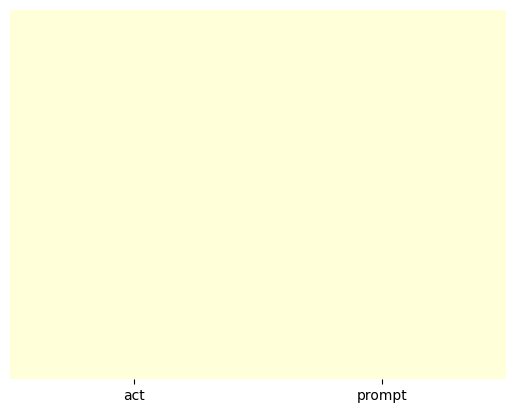

In [6]:
# None visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

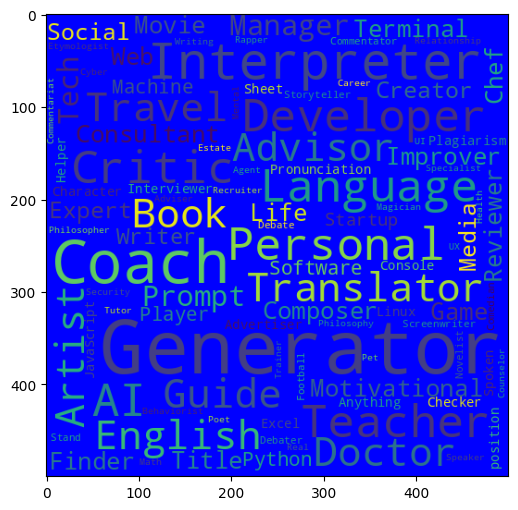

In [7]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='blue')
spam_wc = wc.generate(df['act'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

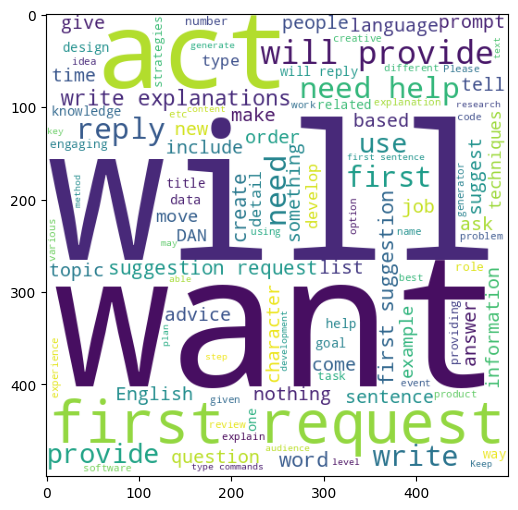

In [8]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df['prompt'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# Preprocessing

In [9]:
def transform_text(text):
    # Convert the text to lowercase and tokenize it
    tokens = nltk.word_tokenize(text.lower())

    
    # Remove non-alphanumeric tokens (%^# )
    tokens = [t for t in tokens if t.isalnum()]
    
    # Remove stopwords and punctuation (I, how, u, are, is)
    stopwords_set = set(nltk.corpus.stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    tokens = [t for t in tokens if t not in stopwords_set and t not in punctuation_set]
    
    wnl = WordNetLemmatizer()
    lemm_text = [wnl.lemmatize(word) for word in text.lower()] 
    
    # Join the tokens back into a string and return it
    return " ".join(tokens)

In [10]:
input_prompt = 'I need some help with English'
input_prompt_transformed = transform_text(input_prompt)
prompts = df['prompt'].tolist()
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the prompts into TF-IDF vectors
prompt_vectors = vectorizer.fit_transform(prompts)

# Transform the input text into a TF-IDF vector
input_vector = vectorizer.transform([input_prompt_transformed])

# Compute the cosine similarity between the input and each prompt
similarity_scores = cosine_similarity(input_vector, prompt_vectors)
# Find the index of the most similar prompt
most_similar_index = similarity_scores.argmax()

# Print the most similar prompt
output_prompt = prompts[most_similar_index]
print(f'Improved output prompt: {output_prompt}')

Improved output prompt: I want you to act as a spoken English teacher and improver. I will speak to you in English and you will reply to me in English to practice my spoken English. I want you to keep your reply neat, limiting the reply to 100 words. I want you to strictly correct my grammar mistakes, typos, and factual errors. I want you to ask me a question in your reply. Now let's start practicing, you could ask me a question first. Remember, I want you to strictly correct my grammar mistakes, typos, and factual errors.


## Exporting the vectorizer

In [11]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))